In [20]:
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage

In [154]:
cohorts_dir = Path("../Cohorts").resolve()
assert cohorts_dir.exists() and cohorts_dir.is_dir()    
df = pd.read_csv(cohorts_dir / "Augustine/expressions.tsv.gz", sep="\t", compression="gzip", index_col=0).T
df = 1e6 * df.div(df.sum(axis=1), axis=0)
df = np.log2(df)

In [155]:
df.head()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,A4GNT,AA06,...,ZYX,ZZEF1,ZZZ3,abParts,av27s1,hADV36S1,hsa-let-7a-3,hsa-let-7b,hsa-mir-4763,mir-223
GSM478912,1.717838,-0.244327,-1.849298,2.609091,-1.745430,-1.498835,-1.849298,-1.849006,-1.849298,-1.649953,...,5.182528,4.275484,5.826287,-1.289879,-1.849298,-1.849298,0.034389,0.034389,0.034389,-1.849298
GSM478913,1.578012,-0.242232,-1.847204,0.695954,-1.022854,-1.496740,-1.847204,-1.846912,-1.847204,-1.513497,...,5.072640,4.178263,5.857365,-1.287784,-1.847204,-1.847204,-0.037727,-0.037727,-0.037727,-1.847204
GSM478914,1.870502,-0.174587,-1.779559,8.838446,3.025744,-1.779559,-1.637027,-1.779266,-1.779559,-1.580213,...,5.652542,4.394217,4.433192,-1.084147,-1.779559,-1.779559,0.865122,0.865122,0.865122,-1.779559
GSM478915,1.580860,-0.167784,-1.772756,9.207339,1.965020,-1.592458,-1.772756,-1.397440,-1.772756,-1.573410,...,6.406234,4.122877,4.578174,7.473335,-1.772756,-1.772756,-0.778332,-0.778332,-0.778332,0.343117
GSM478916,1.553319,-0.254373,-1.800297,8.490050,2.245016,2.856475,-1.800297,-1.800005,-1.800297,-1.616056,...,4.322707,3.733772,4.552428,0.131308,-1.800297,-1.800297,0.493803,0.493803,0.493803,-1.244310


In [156]:
correlation_matrix = df.T.sample(1000).corr()
dissimilarity_matrix = 1 - correlation_matrix
dissimilarity_matrix

,GSM478912,GSM478913,GSM478914,GSM478915,GSM478916,GSM478917,GSM478918,GSM478919,GSM478920,GSM478921,...,GSM478954,GSM478955,GSM478956,GSM478957,GSM478958,GSM478959,GSM478960,GSM478961,GSM478962,GSM478963
GSM478912,0.000000,0.006058,0.075232,0.091194,0.096801,0.084925,0.089282,0.076837,0.091171,0.080756,...,0.165587,0.095515,0.097999,0.127527,0.137729,0.085662,0.097273,0.079805,0.077597,0.088307
GSM478913,0.006058,0.000000,0.074560,0.090041,0.093525,0.081151,0.085462,0.073388,0.087610,0.078642,...,0.164265,0.095362,0.098374,0.123969,0.136286,0.084461,0.097903,0.080941,0.078210,0.086899
GSM478914,0.075232,0.074560,0.000000,0.031414,0.039223,0.080834,0.079617,0.072856,0.084121,0.050201,...,0.123002,0.062075,0.071174,0.099911,0.102112,0.075260,0.066706,0.054314,0.054201,0.079856
GSM478915,0.091194,0.090041,0.031414,0.000000,0.044254,0.083220,0.075023,0.076134,0.079180,0.049560,...,0.089507,0.057861,0.051156,0.091781,0.081026,0.073927,0.054220,0.064955,0.043215,0.080258
GSM478916,0.096801,0.093525,0.039223,0.044254,0.000000,0.085895,0.078077,0.081587,0.089404,0.061666,...,0.077295,0.054176,0.059687,0.087729,0.061159,0.054416,0.060155,0.069228,0.052795,0.090661
GSM478917,0.084925,0.081151,0.080834,0.083220,0.085895,0.000000,0.011047,0.014533,0.012486,0.061158,...,0.113903,0.095253,0.076944,0.100167,0.098373,0.063672,0.052822,0.070586,0.058711,0.056636
GSM478918,0.089282,0.085462,0.079617,0.075023,0.078077,0.011047,0.000000,0.015814,0.009736,0.061203,...,0.101527,0.093915,0.071262,0.089080,0.086910,0.061168,0.046903,0.069949,0.053854,0.053850
GSM478919,0.076837,0.073388,0.072856,0.076134,0.081587,0.014533,0.015814,0.000000,0.018198,0.055271,...,0.118373,0.087077,0.069733,0.098672,0.099430,0.058432,0.055051,0.065983,0.053912,0.054332
GSM478920,0.091171,0.087610,0.084121,0.079180,0.089404,0.012486,0.009736,0.018198,0.000000,0.062685,...,0.111995,0.102658,0.076966,0.094675,0.100253,0.067993,0.054192,0.074538,0.057609,0.052481
GSM478921,0.080756,0.078642,0.050201,0.049560,0.061666,0.061158,0.061203,0.055271,0.062685,0.000000,...,0.110025,0.068946,0.057045,0.093158,0.090062,0.064276,0.054038,0.046121,0.038669,0.061978


In [157]:
hclust_linkage = linkage(squareform(dissimilarity_matrix))

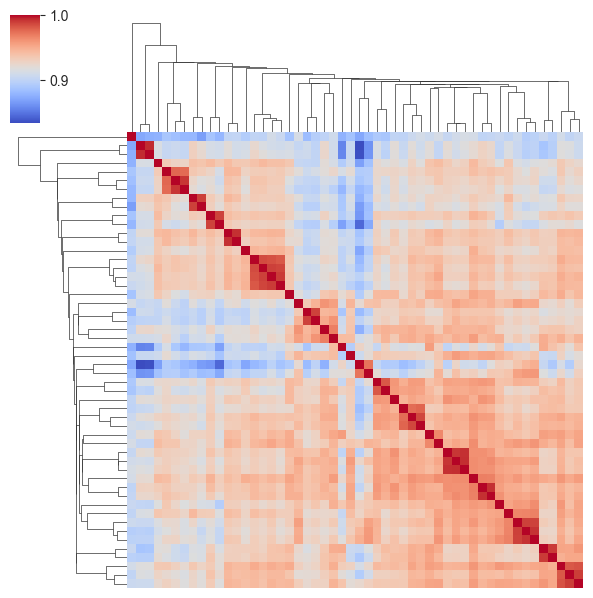

In [158]:
sns.clustermap(1 - dissimilarity_matrix, method='complete',
                       row_linkage=hclust_linkage, col_linkage=hclust_linkage,
                       cmap=matplotlib.cm.coolwarm, yticklabels=False, xticklabels=False,
                       col_colors=None, figsize=(6, 6))
plt.show()

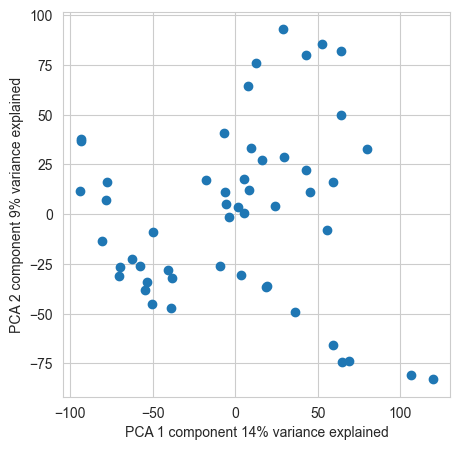

In [159]:
from sklearn.decomposition import PCA
model = PCA(n_components=2, random_state=0)

x_pca = pd.DataFrame(model.fit_transform(df), index=df.index)

label_1 = 'PCA 1 component {}% variance explained'.format(int(model.explained_variance_ratio_[0] * 100))
label_2 = 'PCA 2 component {}% variance explained'.format(int(model.explained_variance_ratio_[1] * 100))

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(*x_pca.values.T)
ax.set_xlabel(label_1)
ax.set_ylabel(label_2)
plt.show()

In [160]:
from portraits.utils import read_gene_sets, ssgsea_formula

signature_dir = Path("../signatures").resolve()
assert signature_dir.exists() and signature_dir.is_dir()
pathways = read_gene_sets(signature_dir / "gene_signatures.gmt")

In [161]:
ssgsea_formula(df, pathways)

,MHCI,MHCII,Coactivation_molecules,Effector_cells,T_cell_traffic,NK_cells,T_cells,B_cells,M1_signatures,Th1_signature,...,Macrophage_DC_traffic,Th2_signature,Protumor_cytokines,CAF,Matrix,Matrix_remodeling,Angiogenesis,Endothelium,Proliferation_rate,EMT_signature
GSM478912,8085.144210,-218.433371,-1694.150862,-3883.617920,-2607.877953,-4193.857756,-2254.859284,-4177.060282,-2534.629625,-3634.999868,...,-3218.862247,-5357.611356,-116.629287,768.721296,3367.391168,-146.742709,900.993990,-944.157515,8333.747928,2928.054101
GSM478913,8053.239010,756.226398,-1823.648007,-3817.605714,-2562.442061,-4025.939015,-2392.415642,-4148.991953,-1997.378506,-3767.960519,...,-3631.972281,-5058.886832,174.912391,809.309582,3445.589815,113.375071,792.634503,-632.997816,8071.498301,3184.988330
GSM478914,9042.201901,8611.148659,-1714.202374,-3962.575823,-813.073230,-2484.744822,-2368.500687,-4332.221776,-1852.201455,-5202.744064,...,1400.124352,-5774.772639,2157.120241,7680.771075,6237.032406,1942.549375,3969.284781,1406.925546,3902.719815,6217.943293
GSM478915,10255.354685,10577.515486,247.684073,-438.787342,5612.532830,-433.657270,40.729591,-3973.794291,-962.462790,-4500.235789,...,4628.837613,-4601.540570,1887.272015,9391.083853,6718.469331,5101.196402,5796.761967,3526.814320,4958.630646,6317.235332
GSM478916,9290.657078,9019.523666,-2421.768559,-3478.199677,-122.150599,-2730.261822,-2351.526328,-4831.232526,-2836.409020,-5376.921038,...,1554.777698,-5670.397905,990.537760,8777.068432,7146.638976,4239.651533,4723.555454,3533.239228,4424.371273,6952.153877
GSM478917,9039.878808,9250.846066,-1217.107382,-1991.254086,358.328630,-3433.173760,-2044.695900,-4191.357094,-3665.027385,-4242.958337,...,-878.117369,-5114.405571,-46.720994,6803.573818,6065.270209,-481.038173,1533.437158,827.017201,5253.879960,3978.798817
GSM478918,10337.632465,9919.443137,-813.372948,-156.760084,3580.654510,-2968.154721,-812.556656,-3559.689585,-3416.121228,-3818.638348,...,114.494692,-5755.465254,-30.540091,6976.732275,6084.737654,-200.071197,1407.786620,1190.747851,4725.600840,4325.914354
GSM478919,9023.324140,9349.462972,-1594.763301,-2478.298334,1316.339652,-3203.714886,-2039.597716,-4782.060409,-3678.393733,-4560.126721,...,-453.082085,-5995.729910,-385.519089,7303.309805,6133.140467,149.009133,1030.370686,597.608490,4948.003407,3688.155220
GSM478920,10482.249543,10097.545461,-682.926913,468.208219,3986.541129,-2557.066818,-49.238428,-3491.607046,-3023.281219,-3039.465346,...,443.009720,-5408.941409,677.907507,7120.533725,6203.263697,-766.795342,1412.498704,1350.459706,5432.423539,4179.946489
GSM478921,8535.500535,9943.587275,-1715.467802,-3945.492473,-98.320489,-4683.516770,-2476.942516,-4427.436701,-3332.382644,-4782.907489,...,284.254399,-4923.503585,1031.896192,8201.151154,5775.143683,2117.674779,3212.089096,2114.856614,5480.382207,4411.124699


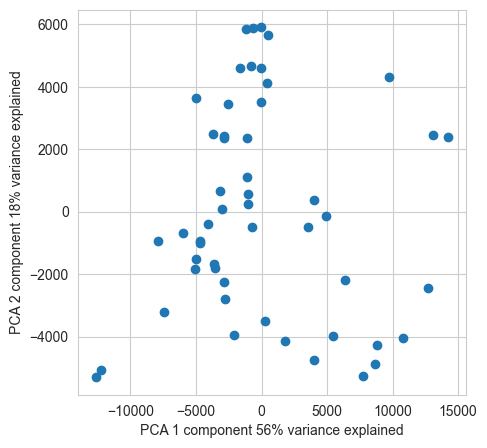

In [162]:
model = PCA(n_components=2, random_state=0)

x_pca = model.fit_transform(ssgsea_formula(df, pathways))

label_1 = 'PCA 1 component {}% variance explained'.format(int(model.explained_variance_ratio_[0] * 100))
label_2 = 'PCA 2 component {}% variance explained'.format(int(model.explained_variance_ratio_[1] * 100))

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(*x_pca.T)
ax.set_xlabel(label_1)
ax.set_ylabel(label_2)
plt.show()

In [165]:
df.head()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,A4GNT,AA06,...,ZYX,ZZEF1,ZZZ3,abParts,av27s1,hADV36S1,hsa-let-7a-3,hsa-let-7b,hsa-mir-4763,mir-223
GSM478912,1.717838,-0.244327,-1.849298,2.609091,-1.745430,-1.498835,-1.849298,-1.849006,-1.849298,-1.649953,...,5.182528,4.275484,5.826287,-1.289879,-1.849298,-1.849298,0.034389,0.034389,0.034389,-1.849298
GSM478913,1.578012,-0.242232,-1.847204,0.695954,-1.022854,-1.496740,-1.847204,-1.846912,-1.847204,-1.513497,...,5.072640,4.178263,5.857365,-1.287784,-1.847204,-1.847204,-0.037727,-0.037727,-0.037727,-1.847204
GSM478914,1.870502,-0.174587,-1.779559,8.838446,3.025744,-1.779559,-1.637027,-1.779266,-1.779559,-1.580213,...,5.652542,4.394217,4.433192,-1.084147,-1.779559,-1.779559,0.865122,0.865122,0.865122,-1.779559
GSM478915,1.580860,-0.167784,-1.772756,9.207339,1.965020,-1.592458,-1.772756,-1.397440,-1.772756,-1.573410,...,6.406234,4.122877,4.578174,7.473335,-1.772756,-1.772756,-0.778332,-0.778332,-0.778332,0.343117
GSM478916,1.553319,-0.254373,-1.800297,8.490050,2.245016,2.856475,-1.800297,-1.800005,-1.800297,-1.616056,...,4.322707,3.733772,4.552428,0.131308,-1.800297,-1.800297,0.493803,0.493803,0.493803,-1.244310
